In [2]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt

In [4]:
df = pd.read_pickle('data/select-wind-power.pkl')
df

,index,Year,Company Name,EIA\nPlant ID,CEC\nPlant ID,Plant Name,State,Capacity (MW),Gross MWh,Net MWh,...,NumberOfUnits,latitude,longitude,per_turb_power,per_turb_capacity,per_turb_cap_frac,mean_wind_speed,mean_cubed_wind_speed,mean area,elevation
0,106,2019.0,Terra-Gen Operating Company,57282,W0370,Alta I Wind Energy Center,CA,150.0,366369,366369,...,100.0,35.0192,-118.3031,0.418393,1.500000,0.278929,9.656256,2031.653931,NaN,1036.133301
1,107,2019.0,Terra-Gen Operating Company,57291,W0372,Alta II Wind Energy Center,CA,150.0,301923,301923,...,50.0,35.0192,-118.3031,0.689592,3.000000,0.229864,9.656256,2031.653931,NaN,1036.133301
2,108,2019.0,Terra-Gen Operating Company,57292,W0387,Alta III Wind Energy Center,CA,150.0,316458,316458,...,50.0,35.0192,-118.3031,0.722790,3.000000,0.240930,9.656256,2031.653931,NaN,1036.133301
3,109,2019.0,Terra-Gen Operating Company,57293,W0388,Alta IV Wind Energy Center,CA,102.0,152311,152311,...,34.0,35.0192,-118.3031,0.511586,3.000000,0.170529,9.656256,2031.653931,NaN,1036.133301
4,110,2019.0,Terra-Gen Operating Company,57294,W0389,Alta V Wind Energy Center,CA,168.0,253993,253993,...,56.0,35.0192,-118.3031,0.517964,3.000000,0.172655,9.656256,2031.653931,NaN,1036.133301
5,0,2019.0,Alta Wind VIII LLC,57835,W0393,"Alta Wind VIII, LLC",CA,150.0,237116,237116,...,43.0,35.0042,-118.2375,0.629736,3.488372,0.180524,8.578656,1502.425903,NaN,923.319702
6,83,2019.0,See WPRS for details,Missing,W0441,Alta X Wind Energy Center,CA,136.8,366791,366791,...,48.0,35.1083,-118.2158,0.872657,2.850000,0.306195,10.060595,2808.307617,NaN,1106.125488
7,84,2019.0,See WPRS for details,Missing,W0442,Alta XI Wind Energy Center,CA,89.7,266379,266379,...,41.0,35.0736,-118.3831,0.741963,2.187805,0.339136,8.210484,969.550476,NaN,1470.677246
8,11,2019.0,Foundation Windpower,57791,W0398,Anheuser-Busch,CA,1.5,2729,2729,...,1.0,38.2322,-122.0892,0.311652,1.500000,0.207768,5.972415,453.699615,NaN,7.402129
9,77,2019.0,See WPRS for details,Missing,W0426,Buena Vista Energy LLC,CA,38.0,87797,87797,...,38.0,37.7347,-121.6519,0.263853,1.000000,0.263853,7.117360,639.768066,NaN,336.164062


In [52]:
wind_speeds = np.load('data/farm_wind_speeds_060320.npy')

In [53]:
wind_speeds.shape

(51, 61368)

In [86]:
365/29

12.586206896551724

In [87]:
61320/(48)

1277.5

In [74]:
365*7*24

61320

In [92]:
365/5

73.0

In [120]:
test = wind_speeds[:,:365*7*24].reshape(-1,7,5,73,24)
test_feature = (test**3).mean(axis=(-1,-2,1))

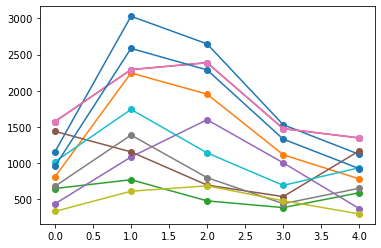

In [132]:
for i in range(0,51,5):
    plt.plot((test[i]**3).mean(axis=(-1,-2,0)),marker='o');
plt.show()
#plt.plot(test[1].reshape(-1,24*5).mean(axis=-1)); plt.show()

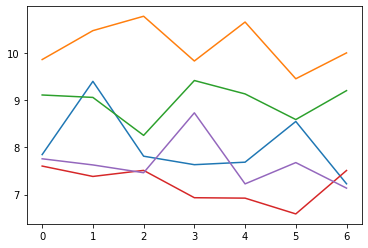

In [100]:
plt.plot(test[7].reshape(7,5,-1).mean(axis=-1))

In [ ]:
np.mean(wind_spee)

In [137]:
X = pd.concat([
    df[['elevation','latitude','longitude']],
    pd.DataFrame(test_feature/np.max(test_feature))
],axis=1)
y = df['per_turb_cap_frac']

In [138]:
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.model_selection import cross_val_score

score_funs = {
    'explained_variance' : explained_variance_score,
    'r2' : r2_score
}
#test a model and print/plot testing results
def test_model(model,X,y, random_state = 0, score = 'explained_variance'):
    score_fun = score_funs[score]
    
    #split the data into training / testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state= random_state)
    
    #cross validate with f1 scores
    scores = cross_val_score(model,X_train,y_train,scoring = score)

    print('cross validation scores:', scores)
    
    #fit data and compare scores for training and testing data
    model = model.fit(X_train, y_train)
    
    print("training data")
    y_pred = model.predict(X_train)
    print(score_fun(y_train, y_pred))
    
    print("testing data")
    y_pred = model.predict(X_test)
    print(score_fun(y_test, y_pred))
    
    #plot confusion matrix and permutation importances
#     fig, (cm_ax,pi_ax) = plt.subplots(1,2,figsize=(18,5))

#     plot_confusion_matrix(model,X_test,y_test,ax=cm_ax,normalize='true')
#     cm_ax.set_title('confusion matrix')
    
#     result = permutation_importance(model, X_test, y_test, n_repeats=10,
#                                 random_state=random_state, n_jobs=1)
#     sorted_idx = result.importances_mean.argsort()

#     pi_ax.boxplot(result.importances[sorted_idx].T,
#                vert=False, labels=X_test.columns[sorted_idx])
#     pi_ax.set_title("Permutation Importances (test set)")
    
#     fig.tight_layout()
#     plt.show()
    
    return model #returns fitted estimator

In [141]:
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor()
model = test_model(model,X,y,score = 'r2')

cross validation scores: [-0.18880971  0.17930735 -5.10554712 -0.476904   -0.42574071]
training data
0.7965202302955388
testing data
-0.04840589303070719
